In [2]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# Exercício 1

![Alt text](image.png)
![Alt text](image-1.png)

## Alínea 1

A função de probabilidade cumulativa é dada por:
$$
\begin{align*}
C(x) &= \int_0^x \rho(u)\ du
\\\\
&= \int_0^x \frac\beta\alpha\cdot\frac{(u/\alpha)^{\beta-1}}{(1+(u/\alpha)^\beta)^2}\ du
\end{align*}
$$

Fazemos agora a seguinte mudança de variável:
$$
\begin{align*}
v &= 1 + (u/\alpha)^\beta
\\\\

dv &= \frac\beta\alpha(u/\alpha)^{\beta-1}du
\end{align*}
$$

Pelo que:
$$
\begin{align*}
C(x) &= \int_0^x \frac\beta\alpha\cdot\frac{(u/\alpha)^{\beta-1}}{(1+(u/\alpha)^\beta)^2}\ du
\\\\
&= \int_1^{1 + (x/\alpha)^\beta}\frac1{v^2}\ dv
\\\\
&= \left[-\frac1v\right]_1^{1 + (x/\alpha)^\beta}
\\\\
&= 1 - \frac1{1 + (x/\alpha)^\beta}
\\\\
&= \frac{1+(x/\alpha)^\beta-1}{1 + (x/\alpha)^\beta}
\\\\
&= \frac1{1+(x/\alpha)^{-\beta}}
\end{align*}
$$

## Alínea 2

Começamos por inverter a função $C$:
$$
\begin{align*}
C(C^{-1}(x)) = x &\Leftrightarrow \frac1{1+(C^{-1}(x)/\alpha)^{-\beta}} = x
\\\\
&\Leftrightarrow 1 = x + x(C^{-1}(x)/\alpha)^{-\beta}
\\\\
&\Leftrightarrow \frac{1-x}{x} = (C^{-1}(x)/\alpha)^{-\beta}
\\\\
&\Leftrightarrow \alpha\left(\frac{1-x}{x}\right)^{-\frac1\beta} = C^{-1}(x)
\end{align*}
$$

### Análise dos Resultados
Podemos ver que os histogramar obtidos pelo método de inversão são compatíveis com as densidades de probabilidade associadas.

In [3]:
def invcontinuo(icdf: Callable, N: int) -> np.ndarray:
    """
        Dada a inversa de uma função de probabilidade acumulada `icdf` devolve `N` amostras retiradas da respetiva distribuição usando o método da inversão no contínuo.
    """
    
    # Resultados
    return icdf(np.random.rand(N))

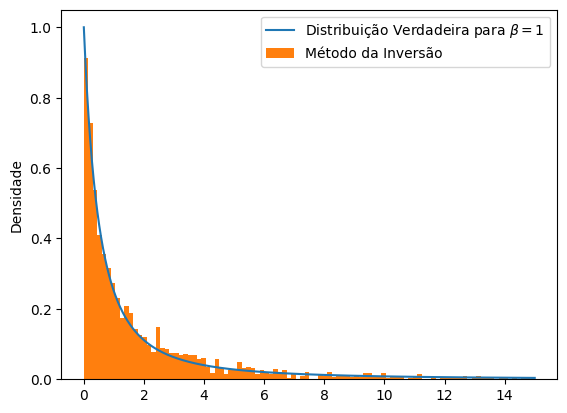

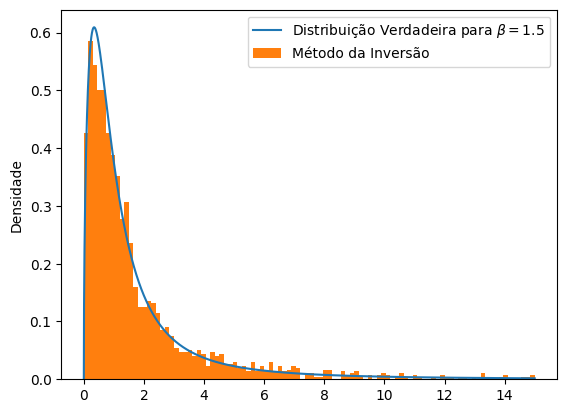

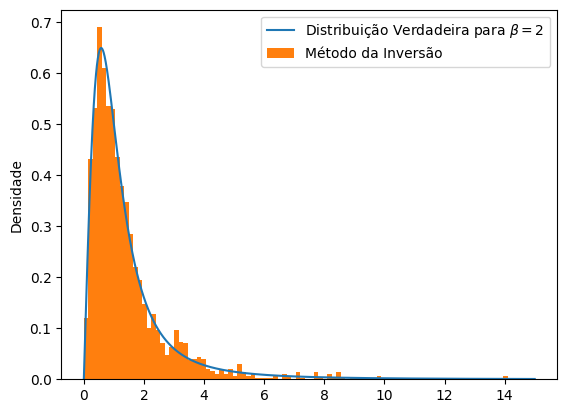

In [4]:
# Funções PDF e iCDF
def gerarfuncs(alpha: float, beta: float) -> (Callable, Callable):
    return (lambda x: (beta/alpha) * ((x/alpha)**(beta-1)/(1+(x/alpha)**beta)**2), lambda x: alpha * (1/x-1)**(-1/beta))


N = 2000
bins = 100
alpha = 1
for beta in [1, 1.5, 2]:
    # Funções em jogo
    pdf, icdf = gerarfuncs(alpha, beta)

    # Gerar amostra
    amostra = invcontinuo(icdf, N)
    amaxi = min(max(amostra), 15)

    # Mostrar distribuição real no mesmo intervalo que a amostra
    xx = np.linspace(0, amaxi, N)
    yy = pdf(xx)

    # Representar graficamente
    plt.plot(xx, yy, label=f"Distribuição Verdadeira para $\\beta = {beta}$")
    plt.hist(amostra, bins, range=(0, amaxi), density=True, label="Método da Inversão")
    plt.ylabel("Densidade")
    plt.legend()
    plt.show()


## Alínea 3

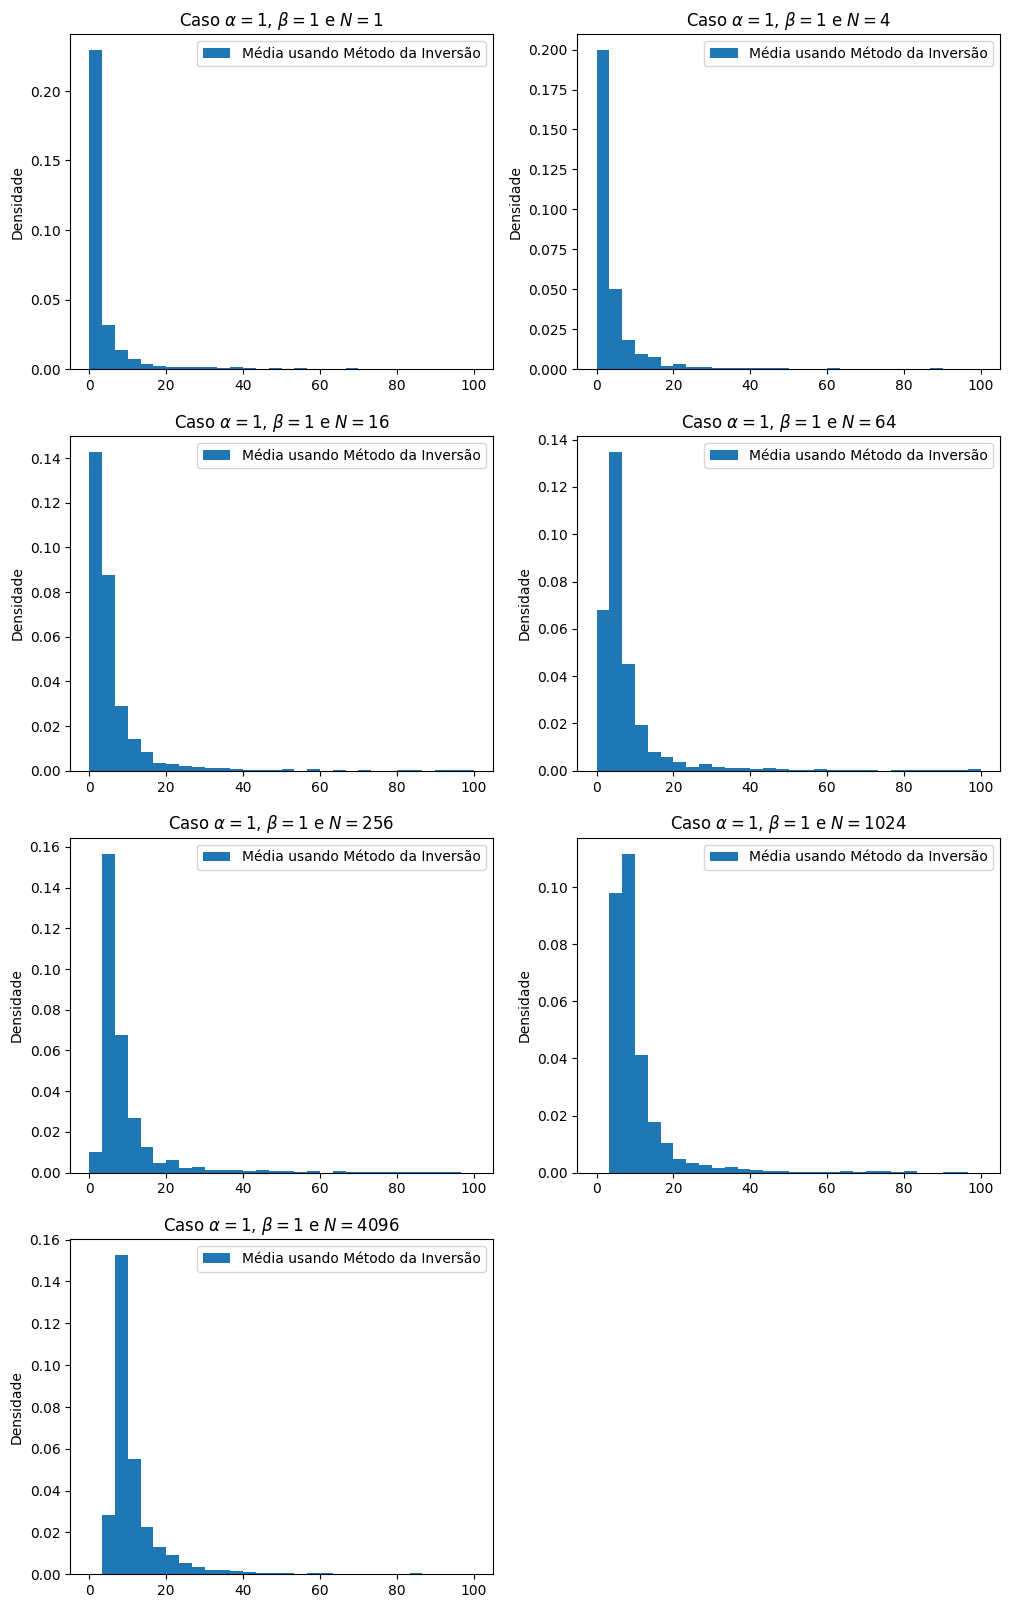

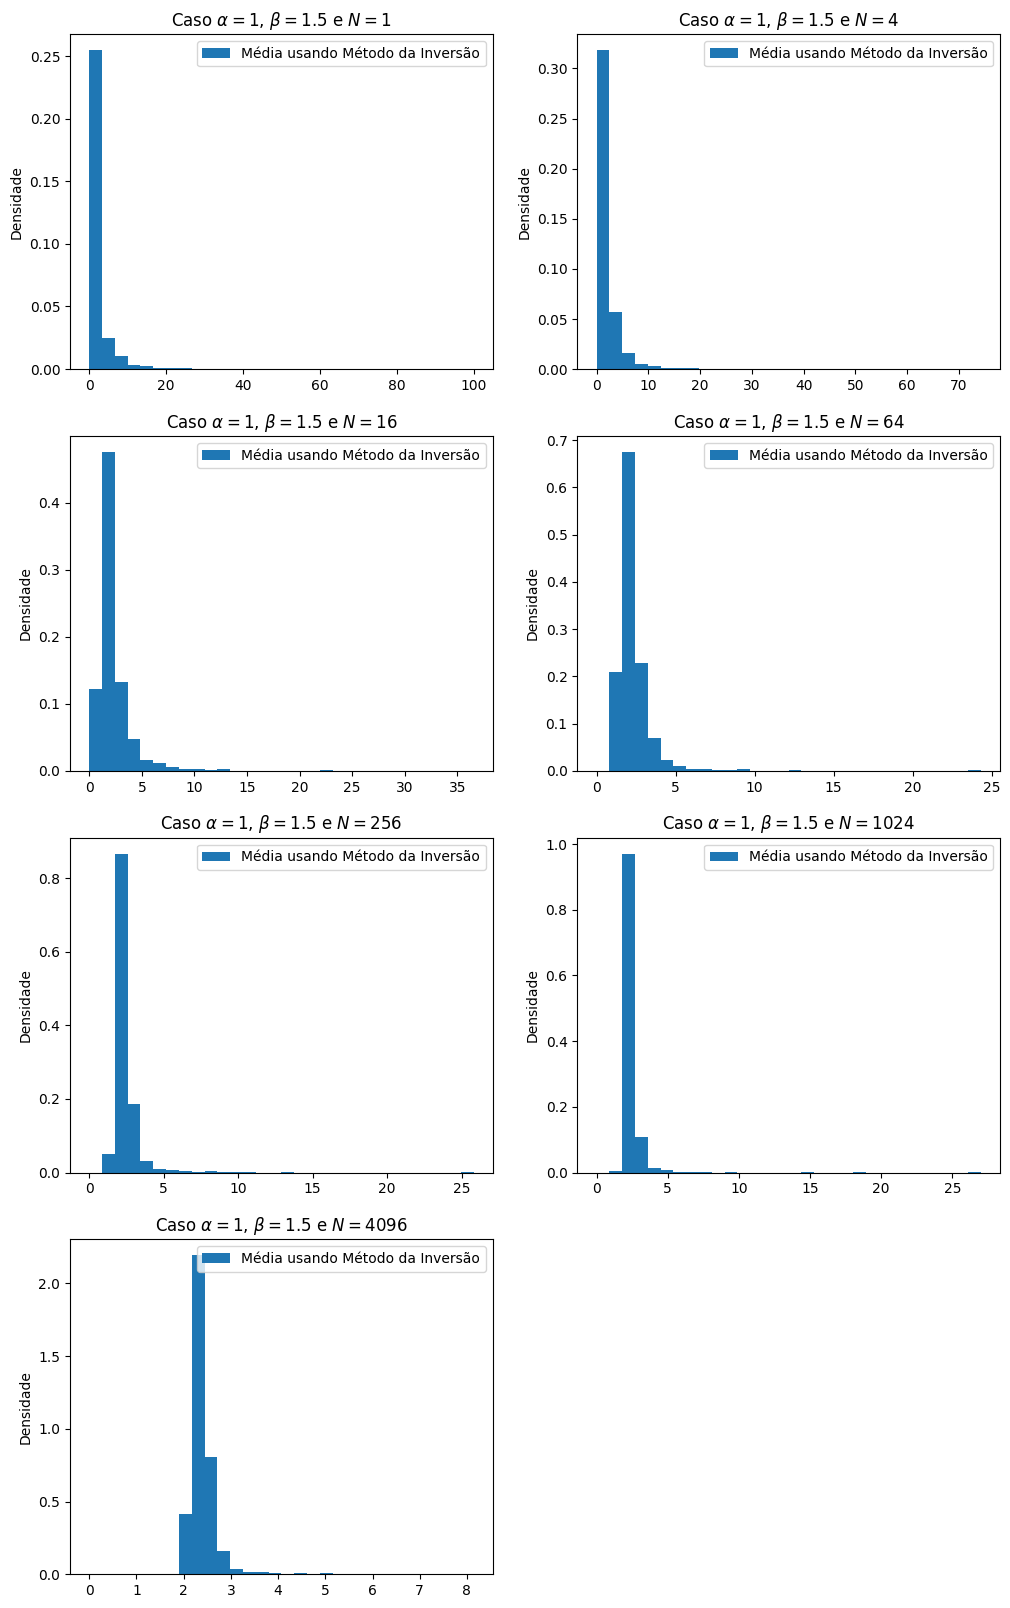

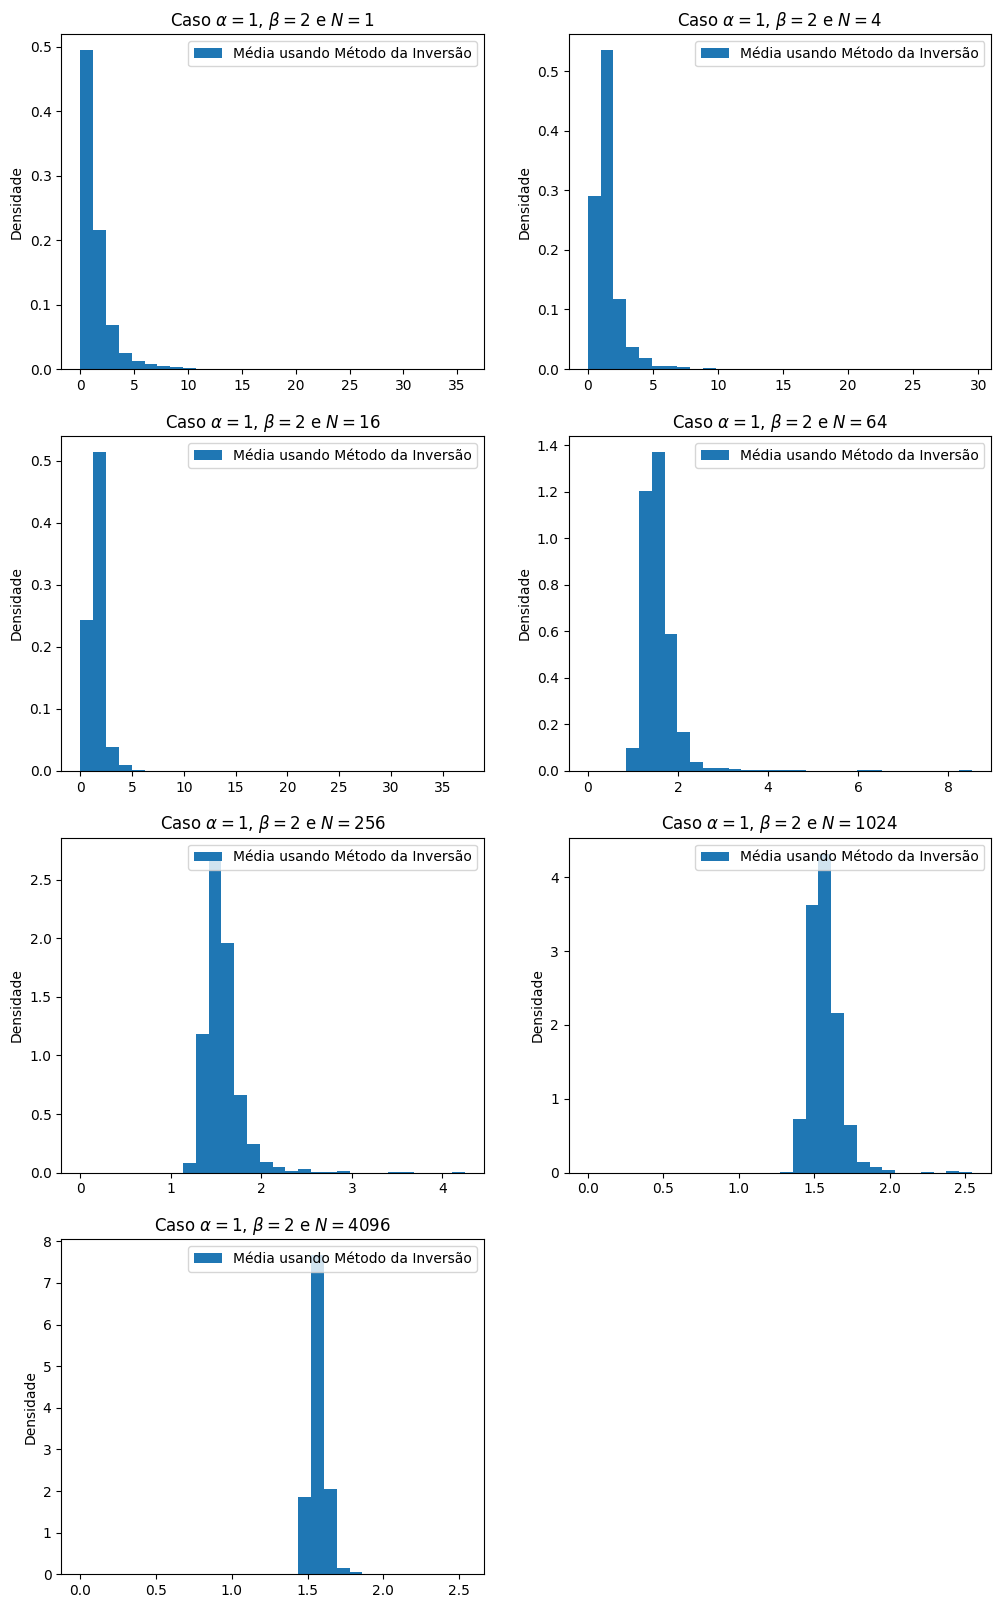

In [5]:
# Parâmetros
reps = 2048
bins = 30
alpha = 1
for beta in [1, 1.5, 2]:
    # Funções em jogo
    pdf, icdf = gerarfuncs(alpha, beta)

    # Agrupar por beta
    cols = 2
    rows = 4
    plt.figure(figsize=(6 * cols, 5 * rows))
    for pos, N in enumerate(2**np.arange(0, 14, 2)):

        medias = np.empty(reps)
        for i in range(reps):
            # Gerar amostra
            amostra = invcontinuo(icdf, N)

            # Calcular média
            medias[i] = sum(amostra)/N
        
        # Janela de visualização
        maxi = min(max(medias), 100)
        
        # Representar graficamente
        plt.subplot(rows, cols, pos+1)
        plt.title(f"Caso $\\alpha = {alpha}$, $\\beta = {beta}$ e $N = {N}$")
        plt.hist(medias, bins, range=(0, maxi), density=True, label="Média usando Método da Inversão")
        plt.ylabel("Densidade")
        plt.legend()
    
    plt.show()

## Alínea 4

O $n$-ésimo momento será dado por:
$$
\begin{align*}
\lang x^n\rang &= \int_0^{+\infty}x^n\rho(x)\ dx
\\\\
&= \int_0^{+\infty} \frac\beta\alpha\cdot\frac{x^n(x/\alpha)^{\beta-1}}{(1+(x/\alpha)^\beta)^2}\ dx
\end{align*}
$$

Fazemos agora a mudança para a variável $v = x/\alpha$:
$$
\begin{align*}
\lang x\rang &= \alpha^n\beta\int_0^{+\infty} \frac{v^{\beta-1+n}}{(1+v^\beta)^2}\ dv
\\\\
&= \alpha\beta\left[\int_0^1 \frac{v^{\beta-1+n}}{(1+v^\beta)^2}\ dv + \int_1^{+\infty}\frac{v^{\beta-1+n}}{(1+v^\beta)^2}\ dv\right]
\end{align*}
$$

Notamos logo que o primeiro integral converge. Para $v \ge 1$ e $\beta \ge 1$ temos que:
$$
\begin{align*}
f_1(v) = v^{-\beta-1+n} = \frac{v^{\beta-1+n}}{(v^\beta)^2}\ge \frac{v^{\beta-1+n}}{(1+v^\beta)^2} \ge \frac{v^\beta}{(v^{\beta}+v^\beta)^2} = \frac{v^{-\beta-1+n}}{4} = f_2(v)
\end{align*}
$$

Vamos agora considerar integrais de domínio em $[1, +\infty[$:
- O integral de $f_2$ converge para $\beta > n$ logo o integral da função enquadrada também converge.
- O integral de $f_1$ diverge para $\beta \le n$ logo o integral da função enquadrada também diverge.

Para o caso de $n=1$, percebemos que o valor médio $\lang x\rang$ só está definido se $\beta > 1$.

---

Podemos verificar este facto nos gráficos da alínea 3. pois no primeiro conjunto de gráficos vemos que os valores obtidos para a média continuam muito dispersos mesmo para $N$ elevado (a janela de visualização continua a ir de $0$ a $100$).

## Alínea 5

### Análise de Resultados

Podemos notar que o desvio padrão da variável aleatória $\bar X_N$ diminui à medida que o valor de $N$ aumenta.

Isto quer dizer que a variável $\bar X_N$ está a ficar cada vez mais concentrada em torno de um só valor! Como este é um estimador centrado para a média de $X$ então quer dizer que este valor é a média de $X$.

---

De forma mais quantitativa, podemos escrever que a variância de $\bar X_N$ irá verificar:

$$
\begin{align*}
\sigma(\bar X_N) &= \frac1{N}\sqrt{\sum_{i=1}^N \text{Var}[X_i]}
\\\\
&= \frac1N\cdot\sqrt{N}\sigma(X_i)
\\\\
&= \frac{\sigma(X_i)}{\sqrt N}
\end{align*}
$$

Sendo que supomos que $\sigma(X_i)$ está definido, o que não é o caso pois $\beta \le 2$.

Contudo, observamos no gráfico abaixo que para $\beta = 2$ de facto o desvio padrão de uma amostra de $\bar X_N$ de tamanho fixo diminui de forma proporcional a $1/\sqrt N$. Pode estar relacionado com o facto de $\beta = 2$ estar na fronteira entre a variância da distribuição existir ou não!

Logo, para $N$ suficientemente grande podemos estar confiantes que o valor de $\bar X_N$ está de facto muito próximo da média.

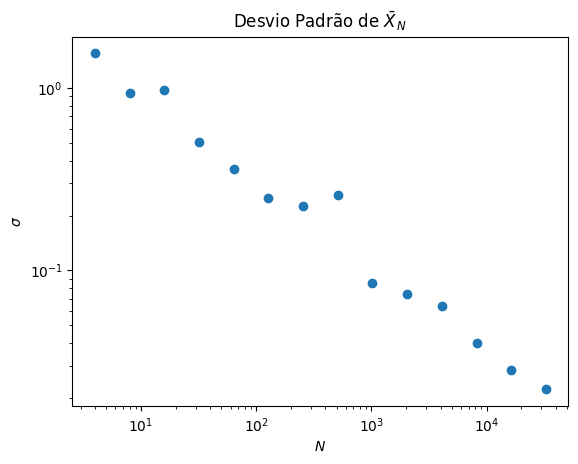

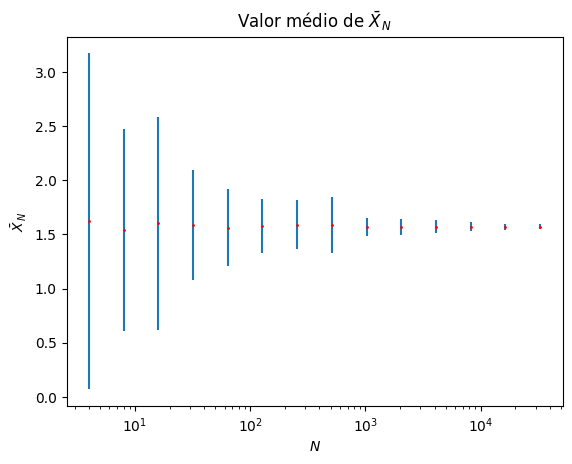

Desvios padrão: [1.55025745 0.93370863 0.98162584 0.50897459 0.35842187 0.24854594
 0.22607713 0.25834438 0.08478877 0.07394482 0.06344255 0.03979528
 0.02848474 0.02228962]


In [6]:
# Parâmetros
reps = 512
alpha = 1
beta = 2

# Funções em jogo
pdf, icdf = gerarfuncs(alpha, beta)
NN = 2**np.arange(2, 16)

meds = np.empty(len(NN))
stds = np.empty(len(NN))
for pos, N in enumerate(NN):

    medias = np.empty(reps)
    for i in range(reps):
        # Gerar amostra
        amostra = invcontinuo(icdf, N)

        # Calcular média
        medias[i] = sum(amostra)/N
    
    # Calcular desvio padrão
    meds[pos] = np.average(medias)
    stds[pos] = np.std(medias, ddof=1)

# Representar graficamente
plt.title(f"Desvio Padrão de $\\bar X_N$")
plt.scatter(NN, stds)
plt.xlabel("$N$")
plt.ylabel("$\\sigma$")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Representar o valor médio com barras de erro
plt.title(f"Valor médio de $\\bar X_N$")
plt.errorbar(NN, meds, stds, fmt="o", ms=1, mfc="red", mec="red")
plt.xlabel("$N$")
plt.ylabel("$\\bar X_N$")
plt.xscale("log")
plt.show()

print("Desvios padrão:", stds)

## Alínea 6

### Análise dos Resultados
Podemos ver que o desvio padrão diminui mais lentamente, parecendo que para de diminuir para os valores de $N$ mais elevados.

Contudo, notamos que o desvio padrão não diminui com $1/\sqrt N$, o que pode estar relacionado com o facto de, para $\beta = 1.5$ a variância não existir.

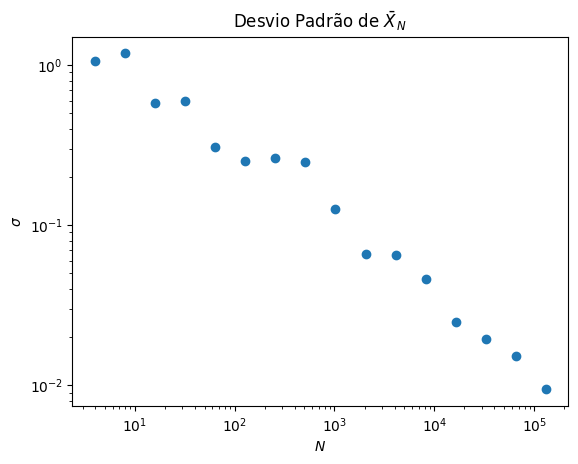

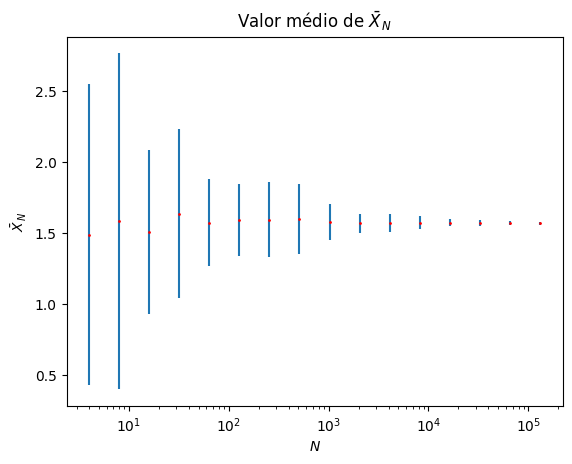

Desvios padrão: [1.06148901 1.18534469 0.58085628 0.59586091 0.307076   0.25189754
 0.26392767 0.24758633 0.1264915  0.06652316 0.06469226 0.04628144
 0.0247408  0.01952252 0.01525066 0.00942459]


In [7]:
# Parâmetros
reps = 128
alpha = 1
beta = 2

# Funções em jogo
pdf, icdf = gerarfuncs(alpha, beta)
NN = 2**np.arange(2, 18)

meds = np.empty(len(NN))
stds = np.empty(len(NN))
for pos, N in enumerate(NN):

    medias = np.empty(reps)
    for i in range(reps):
        # Gerar amostra
        amostra = invcontinuo(icdf, N)

        # Calcular média
        medias[i] = sum(amostra)/N
    
    # Calcular desvio padrão
    meds[pos] = np.average(medias)
    stds[pos] = np.std(medias, ddof=1)

# Representar graficamente
plt.title(f"Desvio Padrão de $\\bar X_N$")
plt.scatter(NN, stds)
plt.xlabel("$N$")
plt.ylabel("$\\sigma$")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Representar o valor médio com barras de erro
plt.title(f"Valor médio de $\\bar X_N$")
plt.errorbar(NN, meds, stds, fmt="o", ms=1, mfc="red", mec="red")
plt.xlabel("$N$")
plt.ylabel("$\\bar X_N$")
plt.xscale("log")
plt.show()

print("Desvios padrão:", stds)

# Exercício 2

![Alt text](image-2.png)

## Alínea 1

A expressão do enunciado indica a função característica da distribuição de probabilidade de uma variável $X$ dada por:
$$
\begin{align*}
X = \frac1N\sum_{i=1}^N X_i
\end{align*}
$$

Onde todas as variáveis $X_i$ são independentes entre si e identicamente distribuidas de acordo da função densidade de probabilidade $\rho$.

---

Vamos calcular o integral desejado usado amostragem por importância:

$$
\begin{align*}
\int_0^{+\infty} \rho(x)e^{-i\frac kN x}\ dx &= \lang e^{-i\frac kN x}\rang_\rho
\\\\
&\approx \frac1N\sum_{j=1}^Ne^{-i\frac kN x_j}
\end{align*}
$$

Onde os $x_j$ são amostrados da distribuição $\rho$.

O erro deste método deverá ser proporcional a $1/\sqrt N$. Para estimar o erro e o valor mais provável para o integral vamos fazer o seguinte:
- Calculamos o integral para cada $k$ 128 vezes, tomando como resultado a média dos valores obtidos.
- A incerteza associada ao valor médio será o desvio padrão da amostra.


Vamos apenas calcular para $k \ge 0$ pois a transformada de Fourier de uma função real $f$ tem simetria hermítica:
$$
\begin{align*}
\tilde f(\omega) &= \tilde f^*(-\omega)
\end{align*}
$$

c:\Users\Gui\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


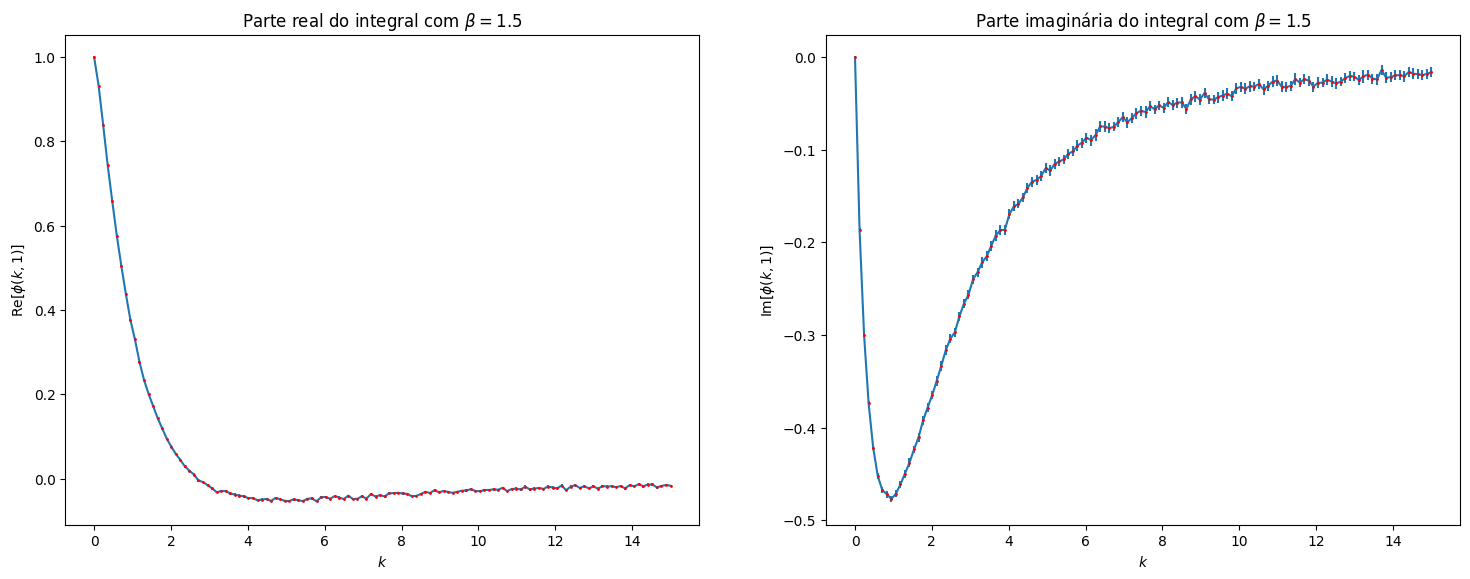

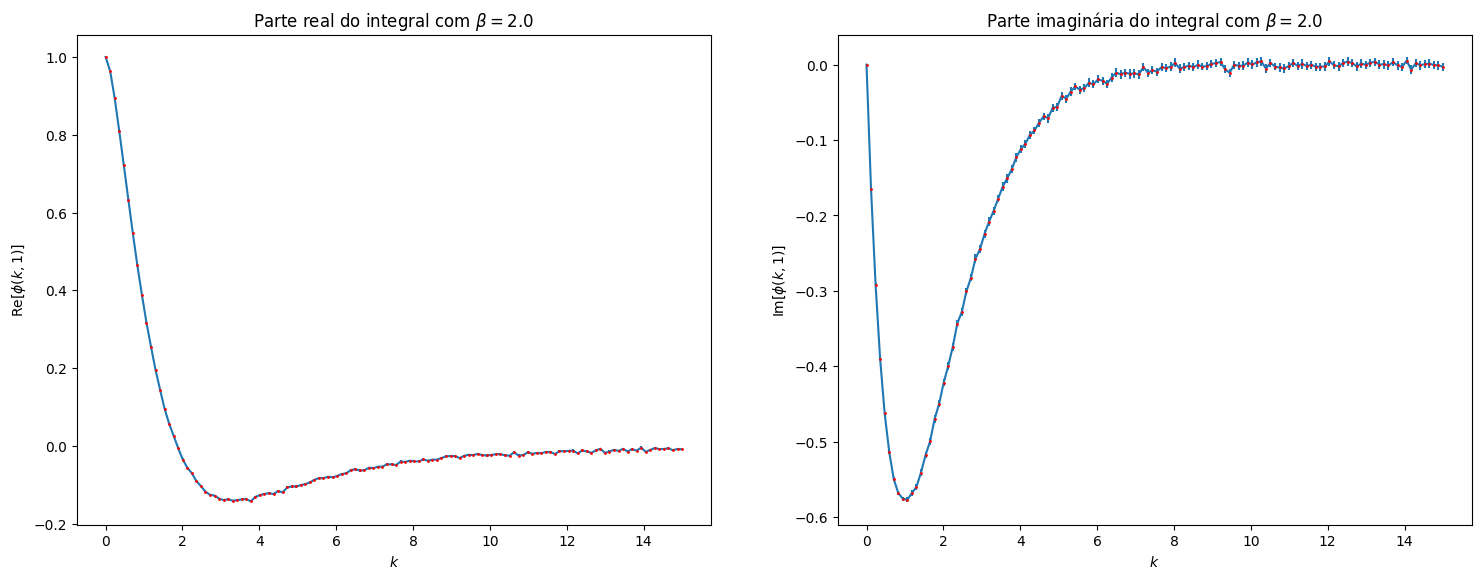

In [10]:
# Parâmetros
M = 512 # Tamanho da amostra usada para calcular o integral
reps = 128
alpha = 1

start = 0
end = 15
points = 128

kk = np.linspace(start, end, points)

# Representação Gráfica
grafpos = 1
cols = 2
rows = 2
for beta in [1.5, 2.0]:
    # Funções em jogo
    pdf, icdf = gerarfuncs(alpha, beta)

    meds = np.empty(len(kk), dtype=np.complex128)
    stds = (np.empty(len(kk), dtype=np.complex128), np.empty(len(kk), dtype=np.complex128))
    for pos, k in enumerate(kk):

        integral = np.empty(reps, dtype=np.complex128)
        for i in range(reps):
            # Gerar amostra
            amostra = invcontinuo(icdf, M)

            # Estimar integral
            integral[i] = np.sum(np.exp(-1j * k * amostra))/M
        
        # Calcular desvio padrão
        meds[pos] = np.average(integral)
        stds[0][pos] = np.std(np.real(integral), ddof=1)
        stds[1][pos] = np.std(np.imag(integral), ddof=1)

    
    plt.figure(figsize=(9 * cols, 7 * rows))

    # Representar graficamente
    plt.subplot(rows, cols, grafpos)
    plt.title(f"Parte real do integral com $\\beta = {beta}$")
    plt.errorbar(kk, np.real(meds), stds[0], fmt="o-", ms=1, mfc="red", mec="red")
    plt.xlabel("$k$")
    plt.ylabel("Re[$\\phi(k, 1)$]")

    # Representar o valor médio com barras de erro
    plt.subplot(rows, cols, grafpos+1)
    plt.title(f"Parte imaginária do integral com $\\beta = {beta}$")
    plt.errorbar(kk, np.imag(meds), stds[1], fmt="o-", ms=1, mfc="red", mec="red")
    plt.xlabel("$k$")
    plt.ylabel("Im[$\\phi(k, 1)$]")

    grafpos += 2

plt.show()

## Alínea 2

c:\Users\Gui\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


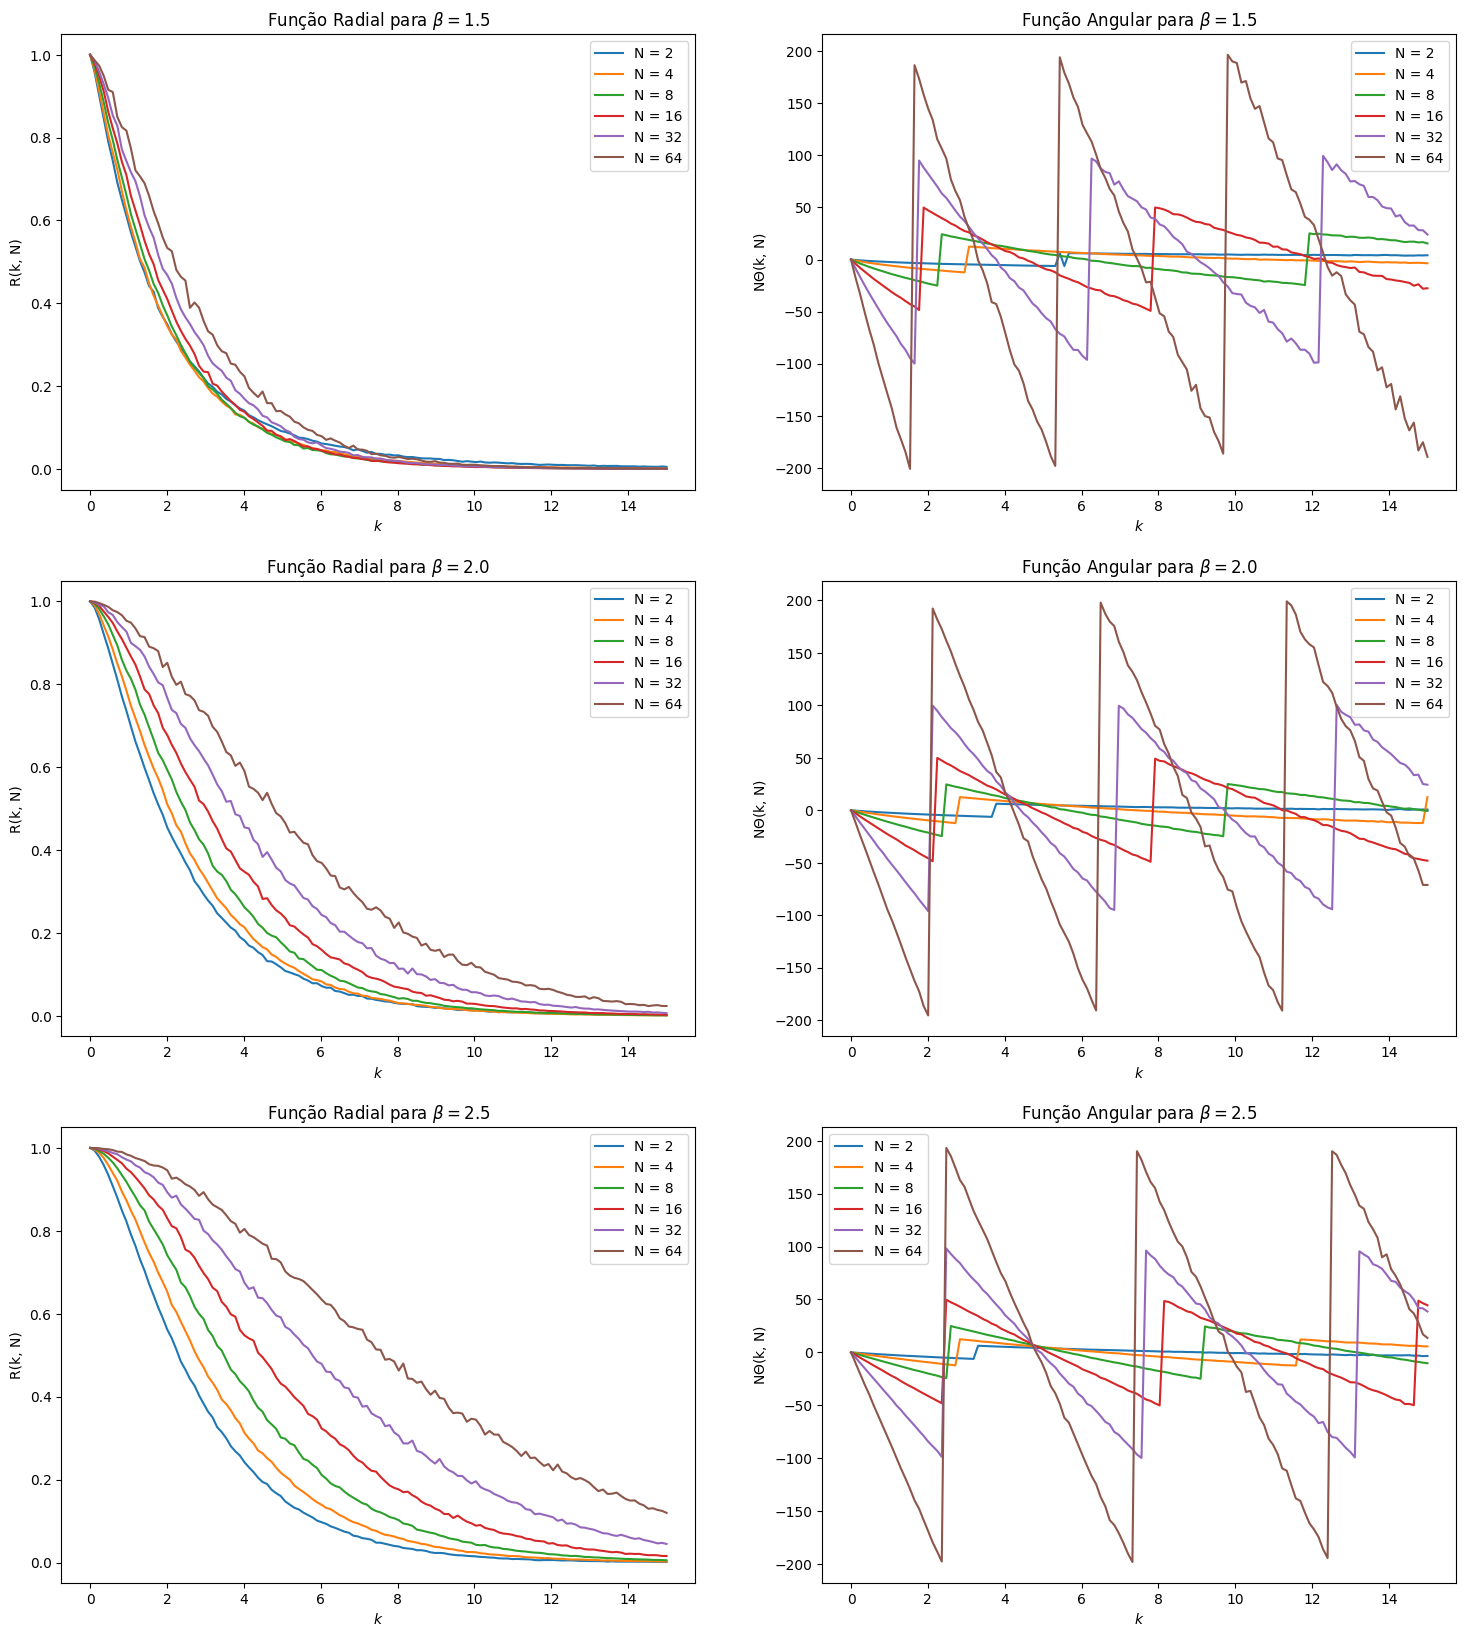

In [29]:
# Parâmetros
M = 512 # Tamanho da amostra usada para calcular o integral
alpha = 1

start = 0
end = 15
points = 128

kk = np.linspace(start, end, points)
NN = 2 ** np.arange(1, 7)

# Representação Gráfica
grafpos = -1
cols = 2
rows = 2 * len(NN)

plt.figure(figsize=(9 * cols, 7 * rows))
for beta in [1.5, 2.0]:
    # Funções em jogo
    pdf, icdf = gerarfuncs(alpha, beta)
    grafpos += 2

    meds = (np.empty(len(kk), dtype=np.complex128), np.empty(len(kk), dtype=np.complex128))
    for N in NN:
        for pos, k in enumerate(kk):

            integral = np.empty(reps, dtype=np.complex128)
            for i in range(reps):
                # Gerar amostra
                amostra = invcontinuo(icdf, M)

                # Estimar integral
                integral[i] = np.sum(np.exp(-1j * (k/N) * amostra))/M
            
            # Calcular média
            imed = (np.average(integral))**N
            meds[0][pos] = np.abs(imed)
            meds[1][pos] = np.angle(imed) * N

        

        # Representar graficamente
        plt.subplot(rows, cols, grafpos)
        plt.title(f"Função Radial para $\\beta = {beta}$")
        plt.plot(kk, meds[0], label=f"N = {N}")
        plt.xlabel("$k$")
        plt.ylabel("R(k, N)")
        plt.legend()

        # Representar o valor médio com barras de erro
        plt.subplot(rows, cols, grafpos+1)
        plt.title(f"Função Angular para $\\beta = {beta}$")
        plt.plot(kk, meds[1], label=f"N = {N}")
        plt.xlabel("$k$")
        plt.ylabel("N$\\Theta$(k, N)")
        plt.legend()


plt.show()